In [1]:
#pip install pandas numpy scikit-learn xgboost lightgbm matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

In [3]:
# Load data
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Data Preprocessing

In [4]:
train.shape

(421570, 5)

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
stores.shape

(45, 3)

In [9]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
features.shape

(8190, 12)

In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
# Merge data
train = train.merge(stores, on='Store')
train = train.merge(features, on=['Store', 'Date', 'IsHoliday'])
test = test.merge(stores, on='Store')
test = test.merge(features, on=['Store', 'Date', 'IsHoliday'])

In [16]:
# Feature engineering
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [17]:
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Day'] = df['Date'].dt.day

In [18]:
# Encode categorical variables
train = pd.get_dummies(train, columns=['Type'])
test = pd.get_dummies(test, columns=['Type'])

In [19]:
# Replace infinite values with NaN
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
# Fill missing values in numeric columns with column mean
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

# Exploratory Data Analysis (EDA)

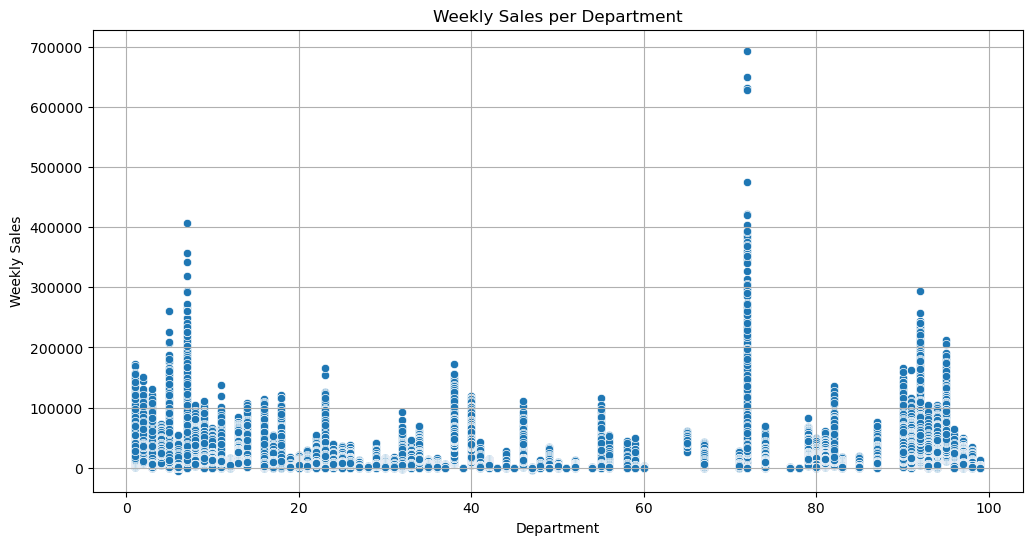

In [21]:
# Scatter plots of sales per department
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Dept',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Weekly Sales per Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.savefig('sales_per_dept.png')
plt.show()

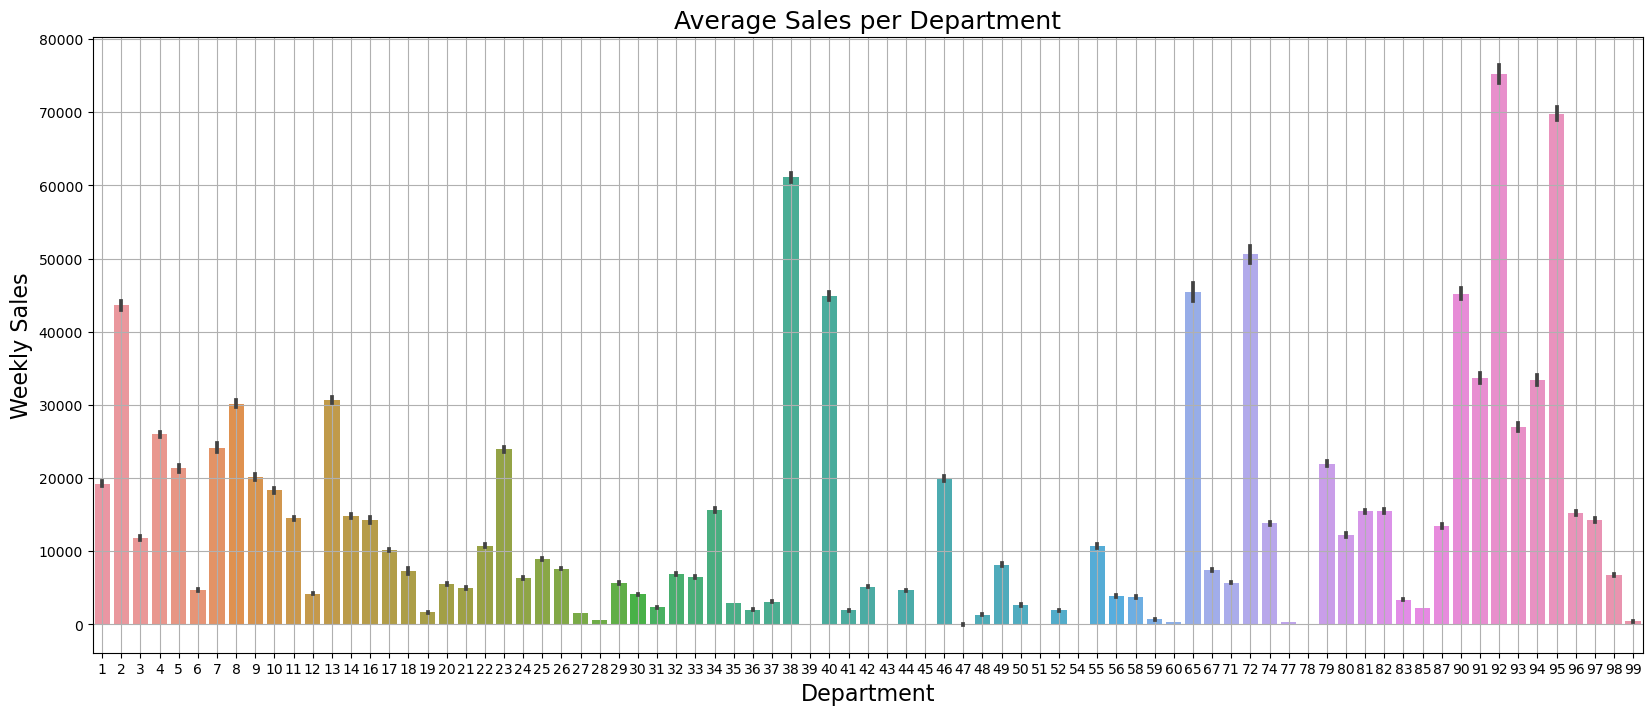

In [22]:
# Average sales per department
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.savefig('avg_sales_dept.png')
plt.show()

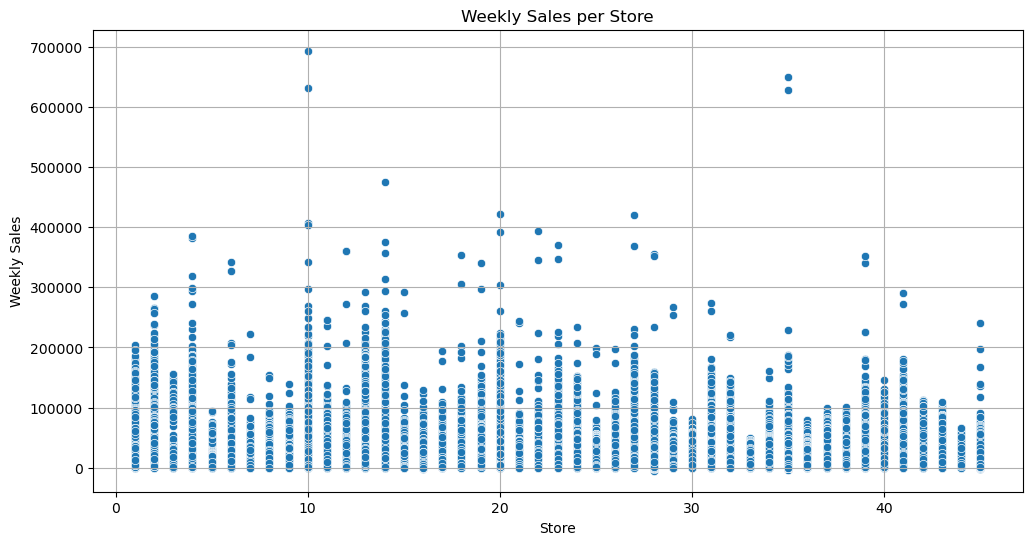

In [23]:
# Scatter plots of Weekly Sales of each Store
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Store', y='Weekly_Sales', data=train)
plt.grid()
plt.title('Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.savefig('sales_per_store.png')
plt.show()

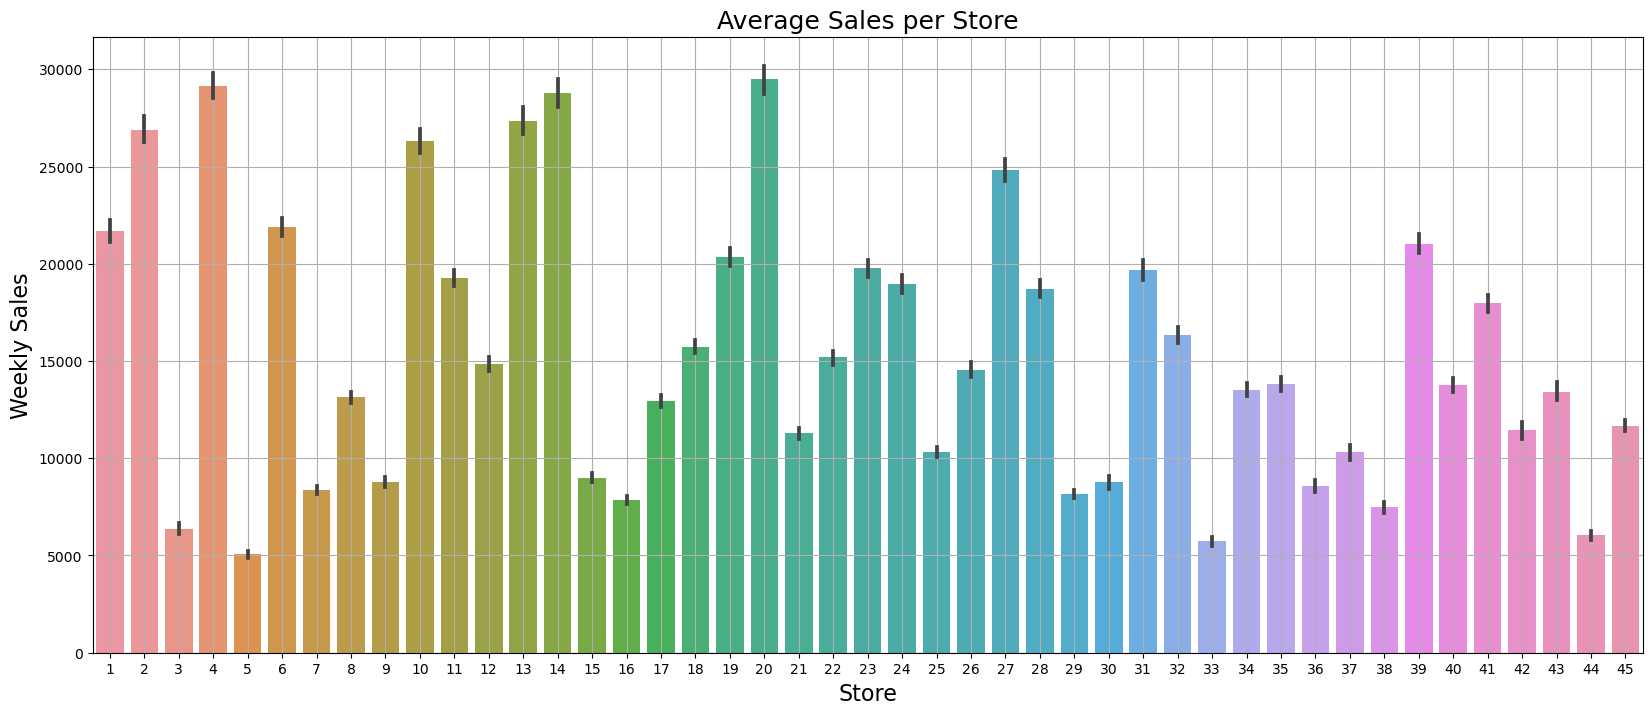

In [24]:
#Average Weekly Sales of each Store
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.savefig('avg_sales_store.png')
plt.show()

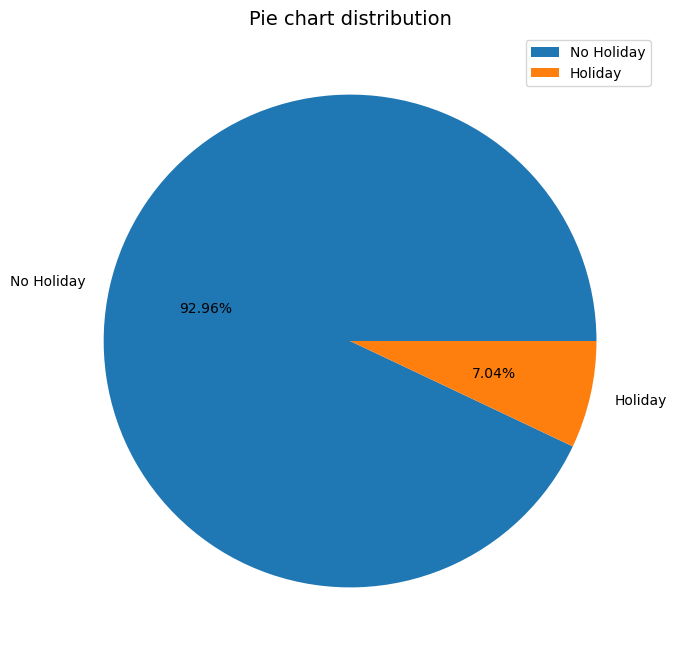

In [25]:
# Holiday Distribution
plt.figure(figsize=(8,8))
plt.pie(train['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('holiday_distribution.png')
plt.show() 

In [26]:
# Monthly Sales for Each Year
data_monthly = pd.crosstab(train["Year"], train["Month"], values=train["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.903330e+08,1.819198e+08,2.314124e+08,1.867109e+08,1.922462e+08,2.325801e+08,1.876401e+08,1.772679e+08,2.171618e+08,2.028534e+08,2.887605e+08
2011,1.637040e+08,1.863313e+08,1.793564e+08,2.265265e+08,1.816482e+08,1.897734e+08,2.299114e+08,1.885993e+08,2.208477e+08,1.832613e+08,2.101624e+08,2.880781e+08
2012,1.688945e+08,1.920636e+08,2.315097e+08,1.889209e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


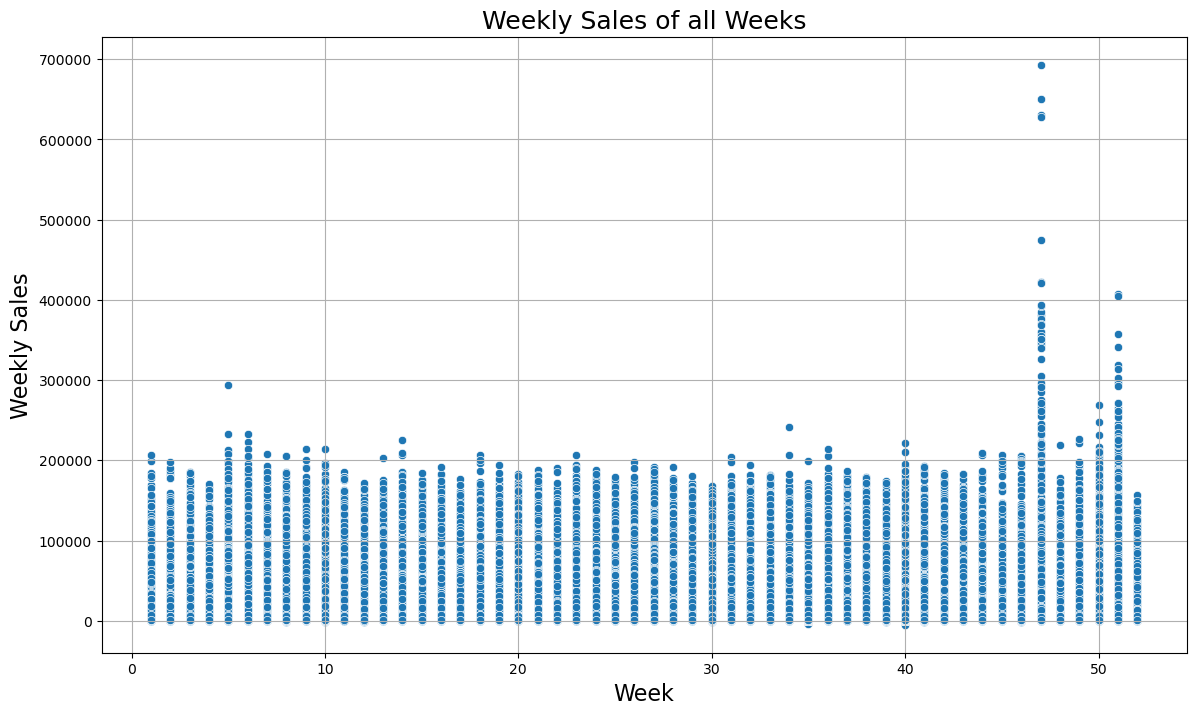

In [27]:
# Scatter plot of Weekly Sales of all Weeks
plt.figure(figsize=(14,8))
sns.scatterplot(x='Week',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Weekly Sales of all Weeks', fontsize=18)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.savefig('weekly_sales.png')
plt.show()

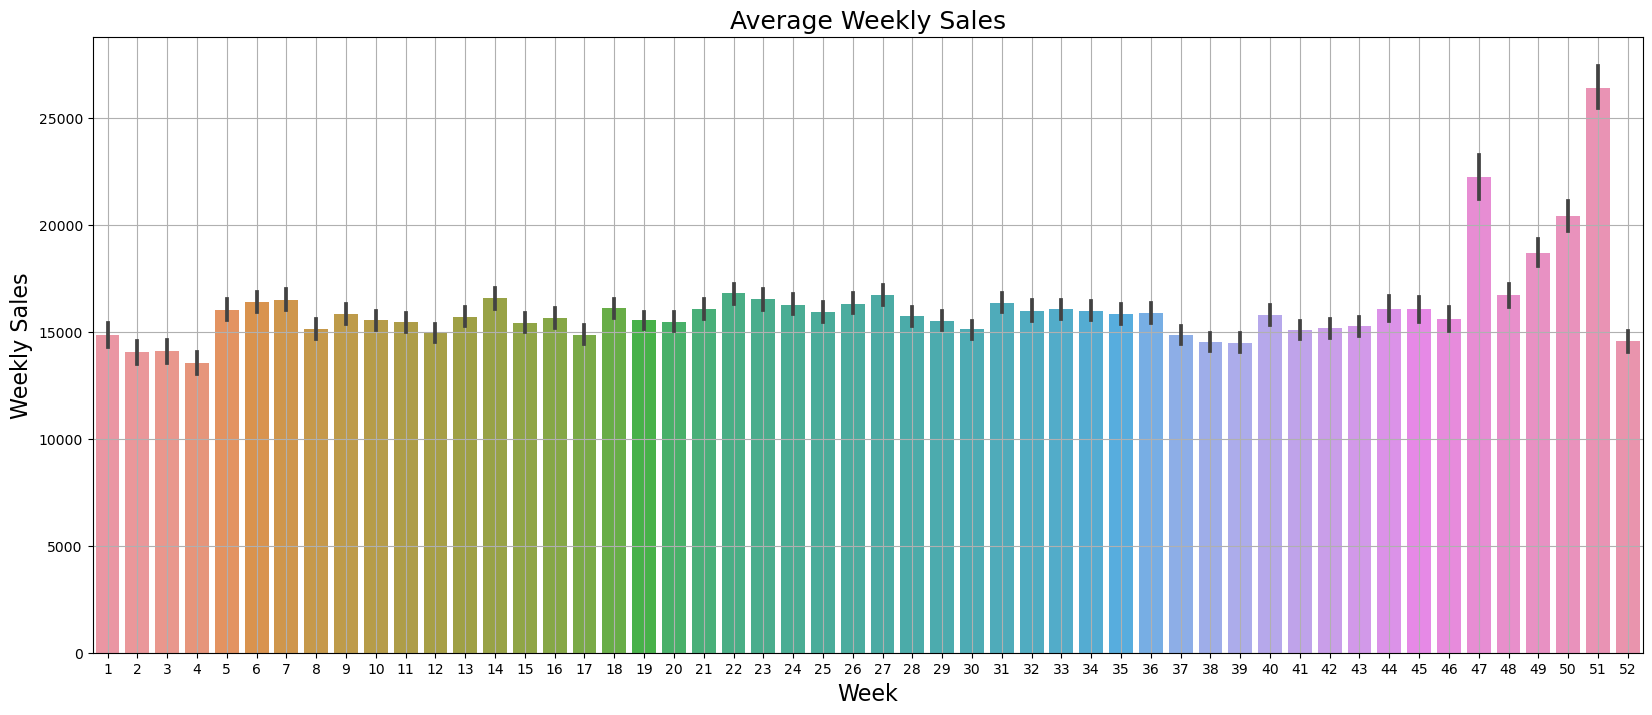

In [28]:
# Average Weekly Sales of all Weeks
plt.figure(figsize=(20,8))
sns.barplot(x='Week',y='Weekly_Sales',data=train)
plt.grid()
plt.title('Average Weekly Sales', fontsize=18)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.savefig('avg_weekly_sales.png')
plt.show()

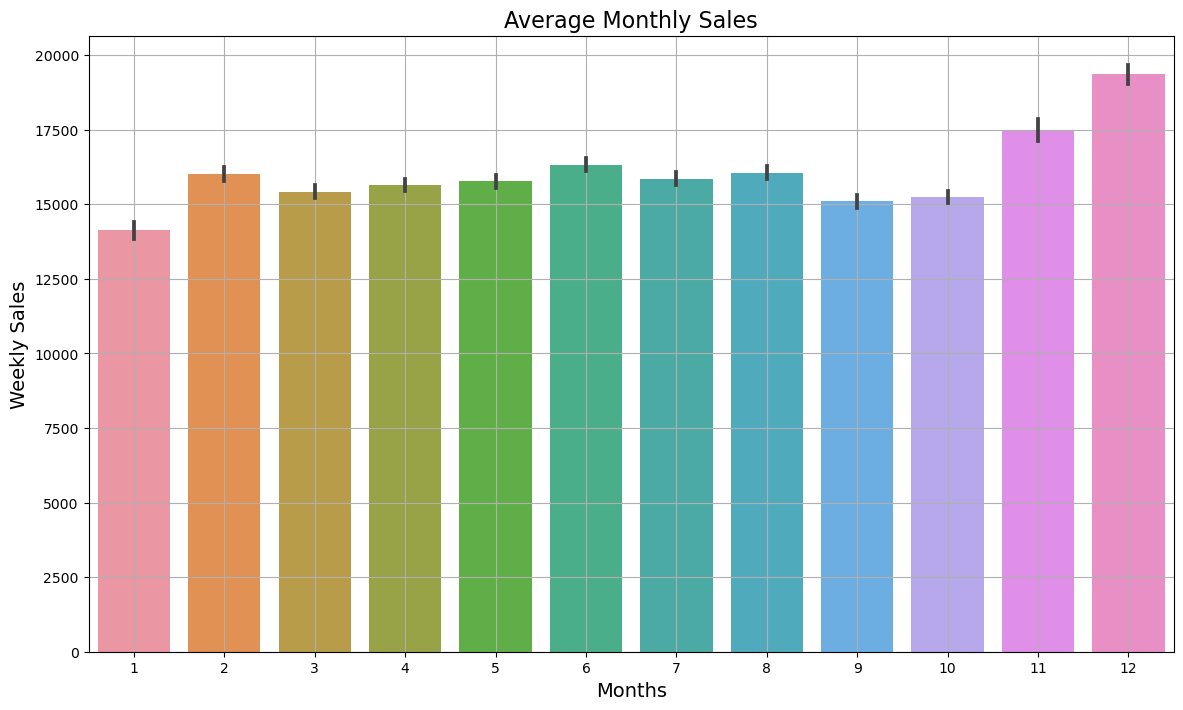

In [29]:
# Average Monthly Sales
plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='Weekly_Sales', data=train)
plt.grid()
plt.xlabel('Months', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Average Monthly Sales', fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.show()

E:\Anaconda-3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda-3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


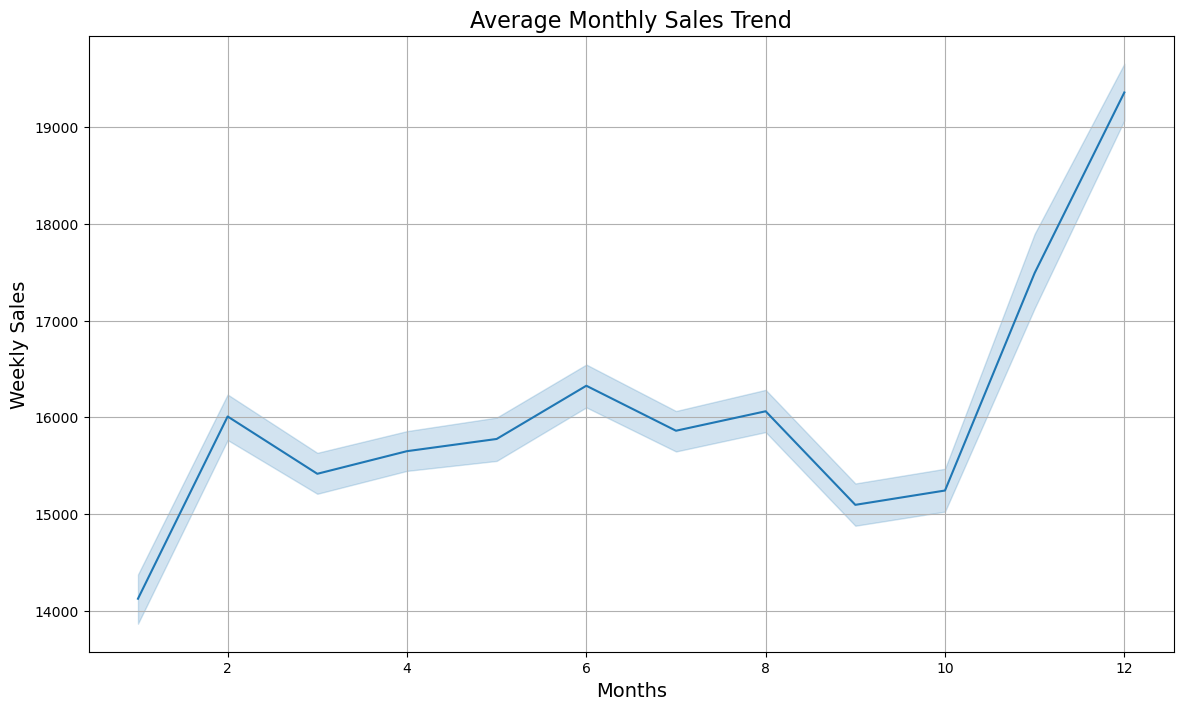

In [30]:
# Average Monthly Sales Trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Weekly_Sales', data=train)
plt.grid()
plt.xlabel('Months', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Average Monthly Sales Trend', fontsize=16)
plt.savefig('avg_monthly_sales_trend.png')
plt.show()

E:\Anaconda-3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda-3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


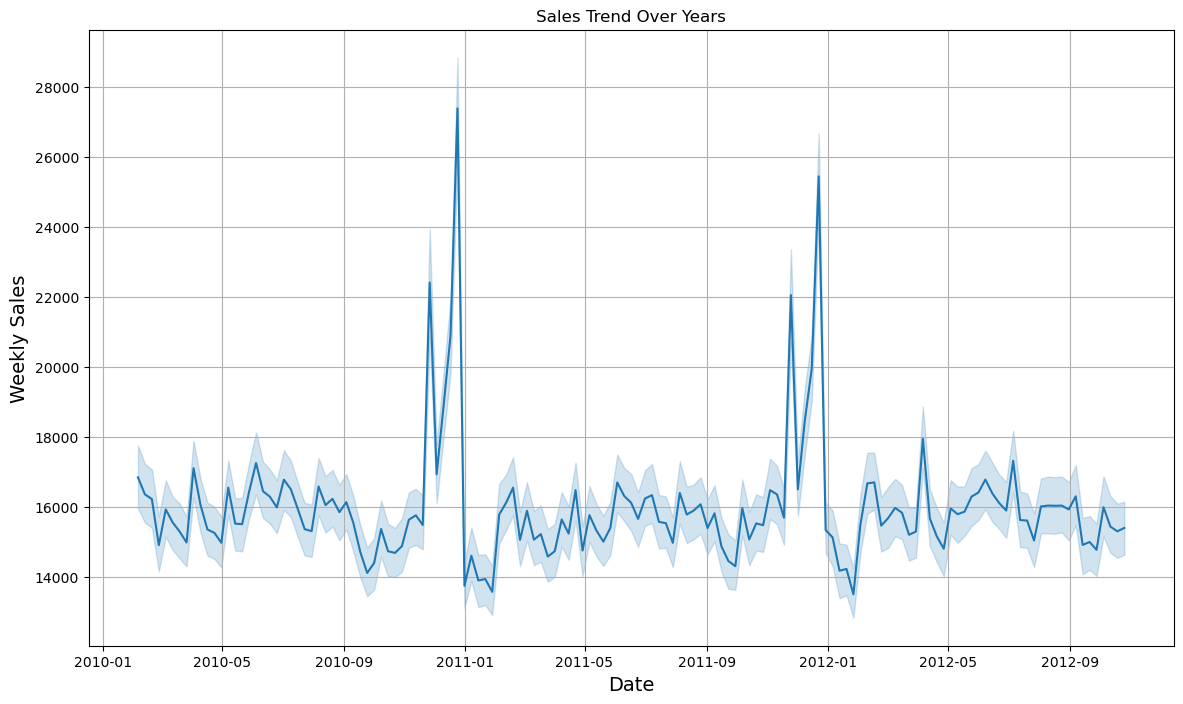

In [31]:
# Sales over Years Trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=train)
plt.grid()
plt.title('Sales Trend Over Years')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.savefig('sales_trend_over_years.png')
plt.show()

E:\Anaconda-3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda-3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


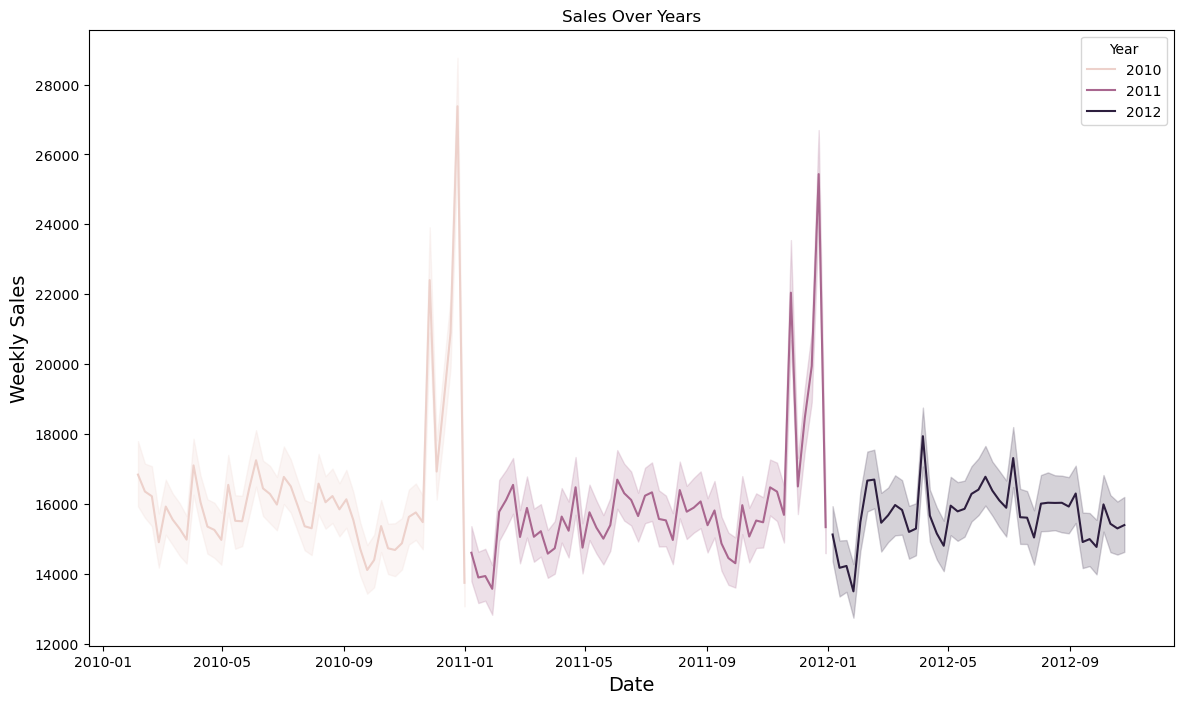

In [32]:
# Sales over Years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Year', data=train)
plt.title('Sales Over Years')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Year', loc='upper right')
plt.savefig('sales_over_years.png')
plt.show()

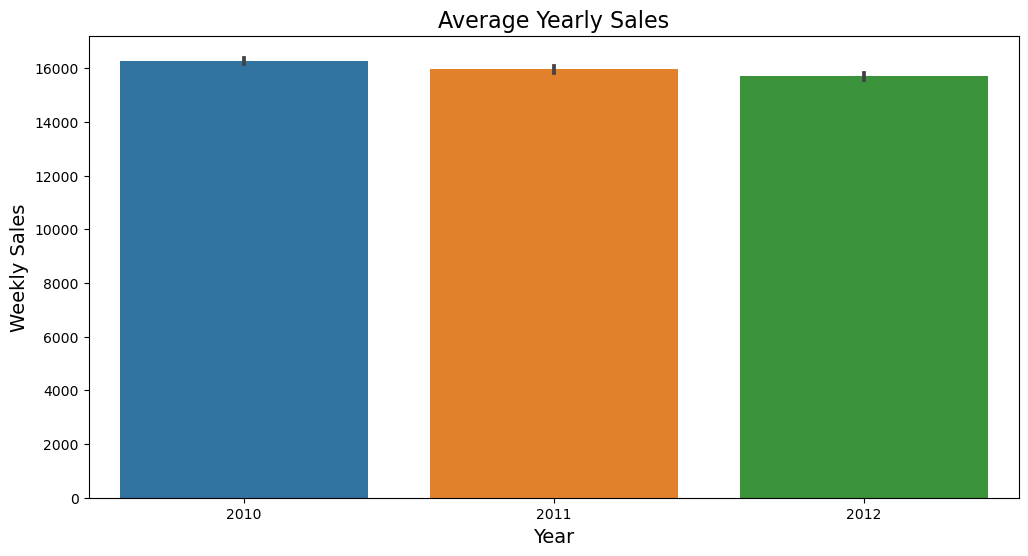

In [33]:
# Average Yearly Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Weekly_Sales', data=train)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Average Yearly Sales', fontsize=16)
plt.savefig('avg_yearly_sale.png')
plt.show()

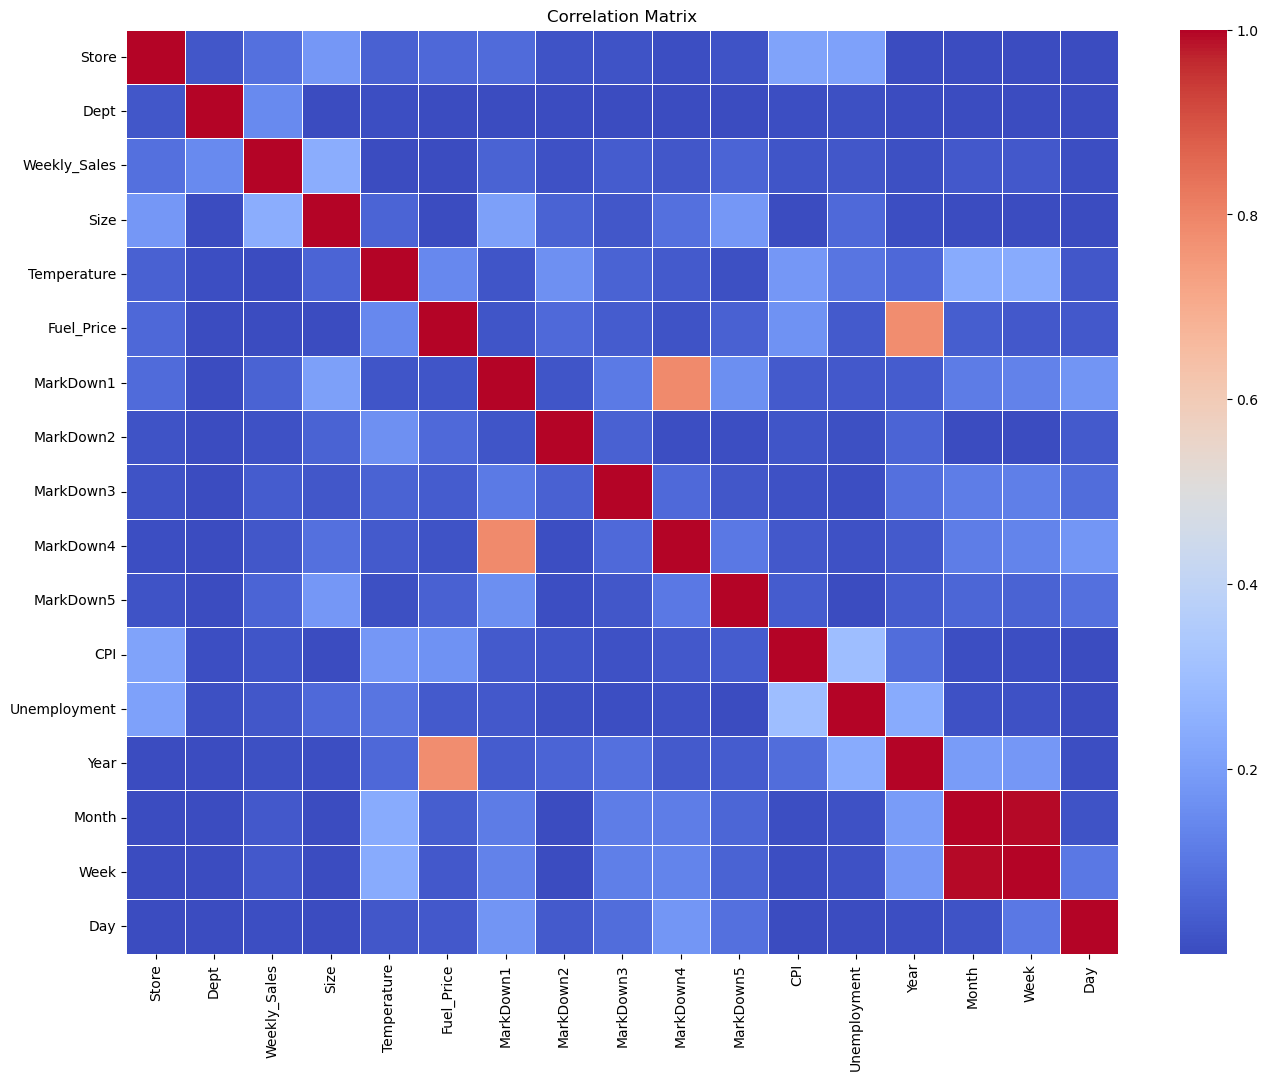

In [34]:
# Correlation matrix
numeric_cols = train.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_cols.corr().abs(), fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Building the Models

In [35]:
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
train['IsHoliday'] = train['IsHoliday'].astype(int)
test['IsHoliday'] = test['IsHoliday'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_14720\1076930699.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14720\1076930699.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill', inplace=True)


In [36]:
# Define features and target
X_train = train.drop(columns=['Weekly_Sales', 'Date'])
y_train = train['Weekly_Sales']
X_test = test.drop(columns=['Date'])

In [37]:
# Function to train and evaluate models
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [38]:
# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_train = np.sqrt(mse_train)
    rmse_val = np.sqrt(mse_val)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Training MSE: {mse_train}, RMSE: {rmse_train}, R2: {r2_train}')
    print(f'Validation MSE: {mse_val}, RMSE: {rmse_val}, R2: {r2_val}')
    print('-' * 30)
    
    return model, rmse_train, rmse_val, r2_train, r2_val

In [39]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

# Training the Models

In [40]:
# Train and evaluate each model
results = []
trained_models = {}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    trained_model, rmse_train, rmse_val, r2_train, r2_val = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)
    trained_models[model_name] = trained_model
    results.append({
        'Model': model_name,
        'RMSE Train': rmse_train,
        'RMSE Val': rmse_val,
        'R2 Train': r2_train,
        'R2 Val': r2_val
    })


Training Linear Regression...
Model: LinearRegression
Training MSE: 467048331.6075449, RMSE: 21611.30101607825, R2: 0.0901261964437915
Validation MSE: 477746751.83462435, RMSE: 21857.418691021692, R2: 0.09126127681117613
------------------------------
Training Decision Tree...
Model: DecisionTreeRegressor
Training MSE: 4.2798532991733105e-32, RMSE: 2.0687806309933663e-16, R2: 1.0
Validation MSE: 25105053.998607565, RMSE: 5010.49438664565, R2: 0.9522468030841195
------------------------------
Training Random Forest...
Model: RandomForestRegressor
Training MSE: 1610153.352170179, RMSE: 1268.9181818266215, R2: 0.9968632018236628
Validation MSE: 11007840.657093056, RMSE: 3317.8066033289306, R2: 0.9790616031916938
------------------------------
Training KNN...
Model: KNeighborsRegressor
Training MSE: 242954946.3317695, RMSE: 15587.012104048983, R2: 0.5266906524410105
Validation MSE: 377027782.0203795, RMSE: 19417.20324919064, R2: 0.28284233451258656
------------------------------
Training X

In [41]:
# Results summary
results_df = pd.DataFrame(results)
print(results_df)

               Model    RMSE Train      RMSE Val  R2 Train    R2 Val
0  Linear Regression  2.161130e+04  21857.418691  0.090126  0.091261
1      Decision Tree  2.068781e-16   5010.494387  1.000000  0.952247
2      Random Forest  1.268918e+03   3317.806603  0.996863  0.979062
3                KNN  1.558701e+04  19417.203249  0.526691  0.282842
4            XGBoost  5.176454e+03   5659.113641  0.947798  0.939083
5           LightGBM  6.642419e+03   6911.776407  0.914045  0.909130


# Performance Comparison of the Models

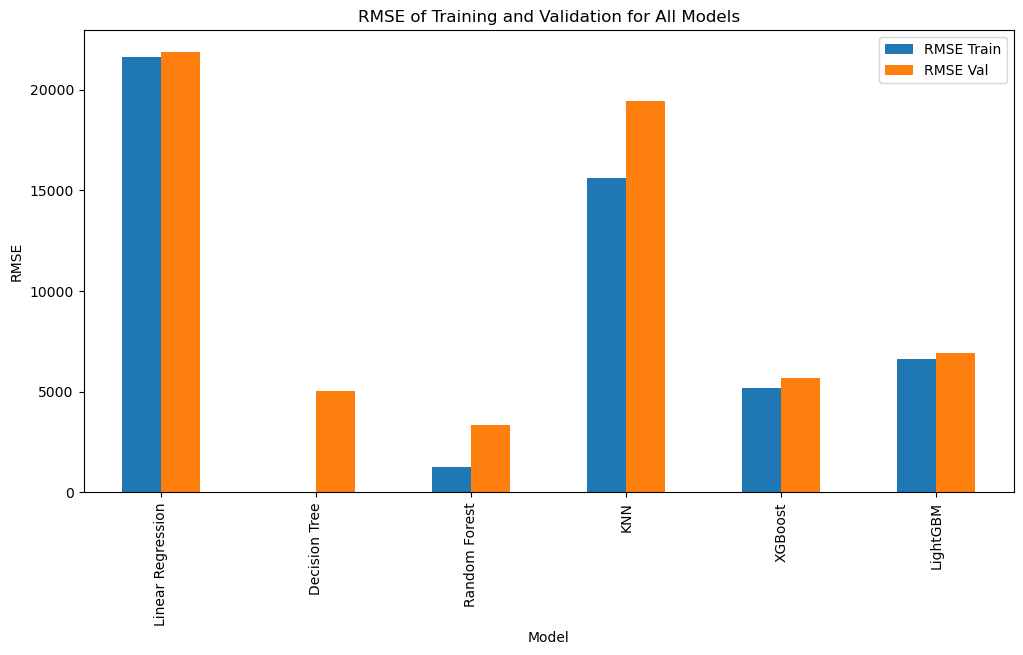

In [42]:
# Comparison of training and validation RMSE
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df[['RMSE Train', 'RMSE Val']].plot(kind='bar', figsize=(12, 6))
plt.title('RMSE of Training and Validation for All Models')
plt.ylabel('RMSE')
plt.savefig('RMSE_of_Train_&_Val_of_all_Models.png')
plt.show()

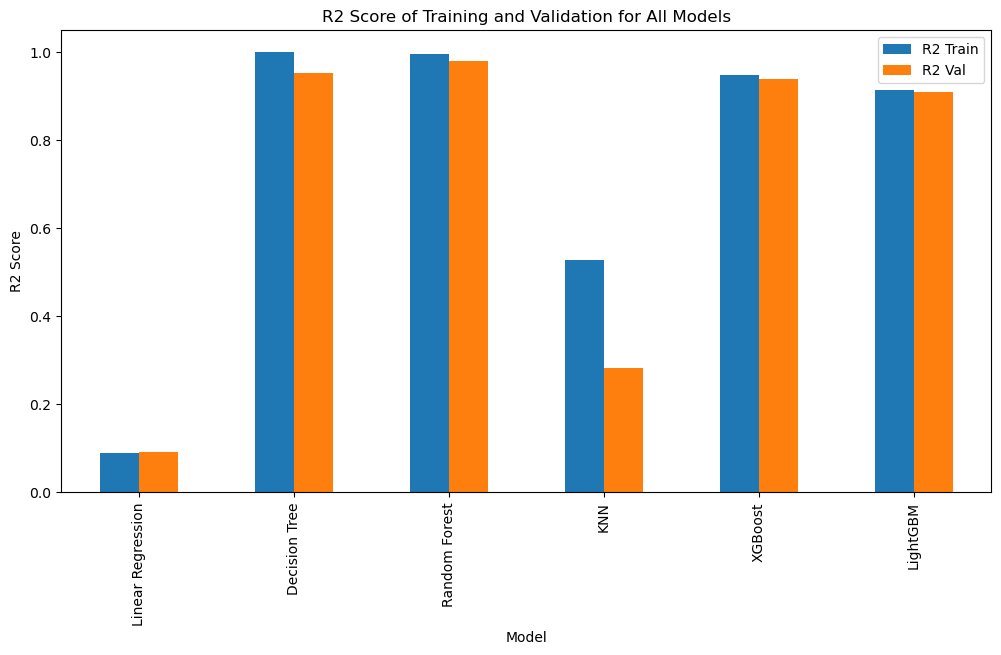

In [43]:
# Comparison of training and validation R2 scores
results_df[['R2 Train', 'R2 Val']].plot(kind='bar', figsize=(12, 6))
plt.title('R2 Score of Training and Validation for All Models')
plt.ylabel('R2 Score')
plt.savefig('R2_of_Train_&_Val_for_all_Models.png')
plt.show()

In [44]:
def plot_predictions(model, X_train, y_train, X_val, y_val):
    print(f"Shapes: X_train={X_train.shape}, y_train={y_train.shape}, X_val={X_val.shape}, y_val={y_val.shape}")
    
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_train, y=y_pred_train)
    plt.xlabel('Actual Train')
    plt.ylabel('Predicted Train')
    plt.title('Actual vs Predicted (Training)')
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_val, y=y_pred_val)
    plt.xlabel('Actual Val')
    plt.ylabel('Predicted Val')
    plt.title('Actual vs Predicted (Validation)')
    
    plt.tight_layout()
    plt.savefig('prediction_performance.png')
    plt.show()


Shapes: X_train=(337256, 20), y_train=(337256,), X_val=(84314, 20), y_val=(84314,)


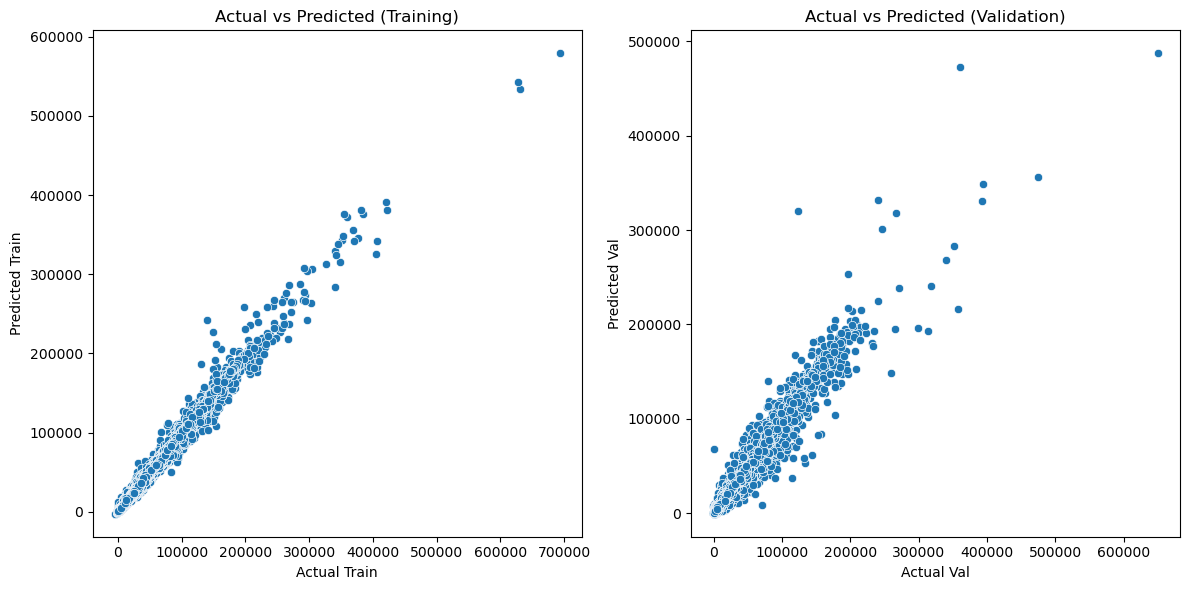

In [45]:
plot_predictions(trained_models['Random Forest'], X_train, y_train, X_val, y_val)